# 2. Clustering

In [40]:
# Importing the needed packages
import pandas as pd
import numpy as np
import random
import functions
import scipy
import math
import tqdm
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from sklearn.cluster import KMeans

In [41]:
# Reading the dataset
df = pd.read_csv('C://Users//Eloisa//Desktop//UNI LORENZO//ADM//Homework 4//Reviews.csv', header = None)

In [42]:
df

,0,1,2,3,4,5,6,7,8,9
0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
...,...,...,...,...,...,...,...,...,...,...
568450,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568451,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568452,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568453,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [43]:
#selecting the column with all reviews
df[9]

0                                                      Text
1         I have bought several of the Vitality canned d...
2         Product arrived labeled as Jumbo Salted Peanut...
3         This is a confection that has been around a fe...
4         If you are looking for the secret ingredient i...
                                ...                        
568450    Great for sesame chicken..this is a good if no...
568451    I'm disappointed with the flavor. The chocolat...
568452    These stars are small, so you can give 10-15 o...
568453    These are the BEST treats for training and rew...
568454    I am very satisfied ,product is as advertised,...
Name: 9, Length: 568455, dtype: object

In [44]:
# Appending to an empty list every review
l = []
for i,(index,row) in enumerate(df.iterrows()):
    if i == 0: 
        continue
    else :
        l.append(row[9])
    

In [45]:
# Importing the package used for the TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# Computing the Tfidf of all the words in the reviews
vectorizer = TfidfVectorizer()
v = vectorizer.fit_transform(l)
print(vectorizer.get_feature_names())

['00', '000', '0000', '000001', '00001', '000013', '0000soo', '0001', '000111052', '0002251337', '0003', '0004', '0006mg', '0008', '000iu', '000kwh', '000mg', '000mi', '000s', '000su', '000usd', '000v', '001', '00100', '00127', '00128', '00129', '00130', '00131', '00132', '00134', '00136', '00139', '001bru', '002', '0020100604', '00202', '00227', '0023', '003', '004', '00493', '005', '00533', '0060187654', '0060721855', '0060928115', '0060959584', '0061658197', '006176793x', '0067575986', '0069615', '007', '00703', '00704', '0071468633', '0071477845', '0071486011', '0071499849', '008', '009373', '0099', '00a', '00am', '00b', '00gr', '00lb', '00m', '00pm', '00s', '00something', '00z', '01', '010', '0100', '01014', '01069', '011', '01152', '012', '013', '01317', '01318', '014', '0140444254', '0140446680', '0143114964', '014mg', '015', '017', '0174', '018', '0188', '019', '01915', '0199232768', '0199535892', '0199536066', '02', '020', '02027c', '02043', '02115', '022313', '022413', '0226'

In [125]:
v

<568454x120252 sparse matrix of type '<class 'numpy.float64'>'
	with 30648852 stored elements in Compressed Sparse Row format>

In [47]:
fn = vectorizer.get_feature_names()

In [48]:
#Total number of different words used in the reviews
len(fn)

120252

In [119]:
# Using nltk to get some words of the food category
from nltk.corpus import wordnet as wn
food1 = wn.synset('food.n.01')
food2 = wn.synset('food.n.02')
z_1 = set([w for s in food1.closure(lambda s:s.hyponyms()) for w in s.lemma_names()])
z_2 = set([w for s in food2.closure(lambda s:s.hyponyms()) for w in s.lemma_names()])
z = list(z_1.intersection(z_2))
len(z)

313

In [121]:
# Removing food words with '_' in them
x = []
for elem in z:
   if '_' not in elem:
        x.append(elem)

In [122]:
len(x)

146

In [123]:
# Doing the intersection between all the words from all the reviews and the food words
final = set(x).intersection(set(fn))

In [124]:
len(final)


107

In [126]:
print(v)

  (0, 73956)	0.1307439785697502
  (0, 108240)	0.051930469968387835
  (0, 9696)	0.3318558874752384
  (0, 97464)	0.13722587318097
  (0, 47808)	0.23674405375127958
  (0, 61806)	0.0530951396686394
  (0, 65312)	0.29944857852502493
  (0, 74890)	0.061335812143070254
  (0, 21549)	0.22921516593493466
  (0, 99686)	0.18550898958125048
  (0, 61953)	0.050510261320822106
  (0, 70919)	0.17952229880924356
  (0, 86746)	0.21783497826543016
  (0, 107778)	0.19936455463364955
  (0, 103013)	0.2640220441997798
  (0, 66909)	0.0775742987408954
  (0, 73778)	0.09563243102323656
  (0, 67849)	0.185483646910669
  (0, 86838)	0.1822639326150843
  (0, 88452)	0.14014461264340256
  (0, 52974)	0.08209412280592458
  (0, 20503)	0.08552074168180455
  (0, 109062)	0.04913355870266548
  (0, 7659)	0.09047661292878785
  (0, 107923)	0.08844401487973891
  :	:
  (568452, 59633)	0.06268917316683888
  (568452, 52974)	0.08622942934967973
  (568452, 20503)	0.08982865643399236
  (568452, 109062)	0.05160855106358571
  (568452, 7659)	0.09

In [130]:
# Saving indexes of the words that we are going to cluster in an empty list 

words_indexes = []
words = vectorizer.get_feature_names()
for e in final:
    words_indexes.append(words.index(e))
print(words_indexes)

[40452, 81539, 95653, 75170, 25449, 34422, 109667, 85456, 119355, 35017, 64403, 75045, 55570, 83970, 77677, 67526, 27729, 84236, 22139, 51899, 24401, 67040, 19596, 24064, 70499, 31024, 28403, 94606, 95959, 34264, 74209, 25936, 28736, 87788, 29325, 84964, 97985, 22593, 92808, 70118, 54641, 47227, 70502, 102008, 70260, 63184, 24037, 110778, 51530, 119374, 65751, 101039, 95810, 103036, 48217, 25144, 82400, 119357, 50025, 63205, 74693, 81604, 74694, 70939, 104313, 65749, 115677, 81740, 51905, 55240, 74802, 85106, 99459, 57924, 28253, 74678, 74399, 29549, 19557, 55156, 118129, 106770, 28025, 29927, 93414, 101116, 86363, 28985, 29120, 21709, 120215, 101185, 33792, 53175, 35084, 88500, 70500, 19928, 20961, 28678, 19908, 29193, 41690, 94097, 36232, 76674, 109074]


In [131]:
# Obtaining the TfIdf dataframe from the sparse matrix 'v'
tfidf_df = pd.DataFrame.sparse.from_spmatrix(v)

In [132]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,120242,120243,120244,120245,120246,120247,120248,120249,120250,120251
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Selecting the columns corresponding to the words of interest
tfidf_df2 = tfidf_df[words_indexes]

In [134]:
tfidf_df2

,40452,81539,95653,75170,25449,34422,109667,85456,119355,35017,...,19928,20961,28678,19908,29193,41690,94097,36232,76674,109074
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136937,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# Computing the transpose of the dataframe in order to apply the SVD
tfidf_df3 = tfidf_df2.transpose()

In [136]:
tfidf_df3

,0,1,2,3,4,5,6,7,8,9,...,568444,568445,568446,568447,568448,568449,568450,568451,568452,568453
40452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
81539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
95653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
94097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
36232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
76674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
tfidf_df3.reset_index(inplace = True)

In [138]:
tfidf_df3

,index,0,1,2,3,4,5,6,7,8,...,568444,568445,568446,568447,568448,568449,568450,568451,568452,568453
0,40452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,81539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,95653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,75170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,25449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,41690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
103,94097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
104,36232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
105,76674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
# Saving word indexes
word_indexes_2 = {}
for index, row in tqdm.tqdm(tfidf_df3.iloc[:,0:1].iterrows()):
    word_indexes_2[index] = row[0]
word_indexes_2

107it [00:00, 4664.94it/s]


{0: 40452,
 1: 81539,
 2: 95653,
 3: 75170,
 4: 25449,
 5: 34422,
 6: 109667,
 7: 85456,
 8: 119355,
 9: 35017,
 10: 64403,
 11: 75045,
 12: 55570,
 13: 83970,
 14: 77677,
 15: 67526,
 16: 27729,
 17: 84236,
 18: 22139,
 19: 51899,
 20: 24401,
 21: 67040,
 22: 19596,
 23: 24064,
 24: 70499,
 25: 31024,
 26: 28403,
 27: 94606,
 28: 95959,
 29: 34264,
 30: 74209,
 31: 25936,
 32: 28736,
 33: 87788,
 34: 29325,
 35: 84964,
 36: 97985,
 37: 22593,
 38: 92808,
 39: 70118,
 40: 54641,
 41: 47227,
 42: 70502,
 43: 102008,
 44: 70260,
 45: 63184,
 46: 24037,
 47: 110778,
 48: 51530,
 49: 119374,
 50: 65751,
 51: 101039,
 52: 95810,
 53: 103036,
 54: 48217,
 55: 25144,
 56: 82400,
 57: 119357,
 58: 50025,
 59: 63205,
 60: 74693,
 61: 81604,
 62: 74694,
 63: 70939,
 64: 104313,
 65: 65749,
 66: 115677,
 67: 81740,
 68: 51905,
 69: 55240,
 70: 74802,
 71: 85106,
 72: 99459,
 73: 57924,
 74: 28253,
 75: 74678,
 76: 74399,
 77: 29549,
 78: 19557,
 79: 55156,
 80: 118129,
 81: 106770,
 82: 28025,
 8

In [140]:
# Retrasforming the dataframe into a sparse matrix object to compute the SVD
v2 = csr_matrix(tfidf_df3.iloc[:,1:])

In [141]:
print(v2)

  (0, 41479)	0.39332048350846505
  (0, 152003)	0.39332048350846505
  (0, 346319)	0.39332048350846505
  (0, 366570)	0.39332048350846505
  (0, 376911)	0.39332048350846505
  (0, 448374)	0.39332048350846505
  (1, 310)	0.15183830450608082
  (1, 383)	0.12864615487878417
  (1, 747)	0.232804189288628
  (1, 1309)	0.20496041118512542
  (1, 1311)	0.351539603088747
  (1, 1441)	0.11781863908504087
  (1, 1503)	0.5982635977592894
  (1, 1504)	0.697801048618447
  (1, 1505)	0.1880730604971544
  (1, 1507)	0.14572538452529685
  (1, 1508)	0.5388485827739877
  (1, 1509)	0.23592770313903244
  (1, 1510)	0.23578385486890593
  (1, 1511)	0.44382369867809657
  (1, 1512)	0.1359076749113466
  (1, 1513)	0.35559870281440414
  (1, 1514)	0.34282092457639424
  (1, 1516)	0.24552830668845776
  (1, 2261)	0.12070451914466784
  :	:
  (106, 565104)	0.12048968736249087
  (106, 565125)	0.11236378916388212
  (106, 565138)	0.12371202403044114
  (106, 565146)	0.12338087342431187
  (106, 565284)	0.05748944146720177
  (106, 565295)	

In [155]:
svd = TruncatedSVD(n_components = 100, n_iter=7, random_state=42)

In [156]:
# Computing the SVD
v3 = svd.fit_transform(v2)

In [158]:
# Visualizing the cumulative explained variance with components from 1 to 100
np.cumsum(svd.explained_variance_ratio_)

array([0.15078638, 0.29010125, 0.36516889, 0.4326748 , 0.49320257,
       0.55181172, 0.60209881, 0.63974864, 0.66808801, 0.69605835,
       0.72343775, 0.74965285, 0.77129643, 0.79193683, 0.81022262,
       0.82429595, 0.83720551, 0.84958685, 0.86055778, 0.87017155,
       0.87967406, 0.88828939, 0.89615262, 0.90278852, 0.90850027,
       0.91413984, 0.91947803, 0.92481581, 0.93010543, 0.93472088,
       0.93886706, 0.94275725, 0.94649774, 0.94959357, 0.95266294,
       0.95565393, 0.95860711, 0.96126155, 0.96378674, 0.96614138,
       0.96816203, 0.97009368, 0.97191268, 0.97363722, 0.97521261,
       0.97673602, 0.97820841, 0.97947644, 0.98059535, 0.98166943,
       0.98272571, 0.98374492, 0.98475335, 0.98575257, 0.98669654,
       0.98761991, 0.98853906, 0.98940975, 0.99024627, 0.99106911,
       0.99178839, 0.99240744, 0.99288125, 0.99333843, 0.99377695,
       0.99420612, 0.99462357, 0.99503366, 0.99533253, 0.99562866,
       0.99590948, 0.99618973, 0.99646011, 0.9967026 , 0.99693

In [157]:
print(v3)

[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.68368045e-02  7.28285677e-02  3.37800219e-01 ...  2.10987938e-06
   3.77100692e-10  7.41069612e-07]
 [ 3.81051088e-15 -0.00000000e+00 -2.00351125e-15 ... -8.37224772e-16
   2.49038118e-16  8.87109123e-17]
 ...
 [ 1.23383304e-02 -3.98725331e-03  8.25357885e-03 ...  1.30888824e-04
   9.28442072e-07  4.62587012e-06]
 [ 2.10699249e-03 -8.72115346e-04 -1.33633177e-04 ... -6.08096825e-07
   3.59224392e-06 -7.75890430e-07]
 [ 1.42696510e-01 -2.01704787e-02  3.60129335e-01 ... -7.54667977e-05
   9.44805950e-07 -3.31443613e-04]]


In [159]:
# Computing the SVD with a number of components that guarantees a cumulative explained variance greater than 60%
svd = TruncatedSVD(n_components = 7, n_iter=7, random_state=42)

In [160]:
v3 = svd.fit_transform(v2)

In [161]:
np.cumsum(svd.explained_variance_ratio_)[6]

0.6020987729603899

In [164]:
# Using the elbow method to determine the number of clusters 
elbow = {}
for k in tqdm.tqdm(range(1,20)):
    elbow_model = KMeans(n_clusters=k)
    elbow_model.fit_predict(v3)
    elbow[k] = elbow_model.inertia_

100%|██████████| 19/19 [00:01<00:00, 12.26it/s]


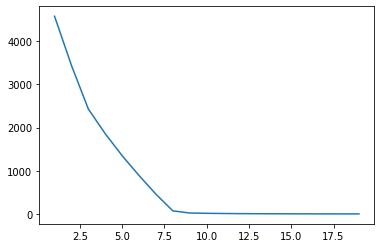

In [165]:
plt.plot(list(elbow.keys()), list(elbow.values()))
plt.show()

In [151]:
# Defining the k-means function from scratch

def my_kmeans(n_clusters, n_features, data):
    
    centroids = []
    clusters = []
    inertias = [0]
    for i in range(n_clusters):
        c = []
        for j in range(n_features):
            c.append(random.uniform(-1.0,+1.0))
        centroids.append(c)
        clusters.append([])
        
    for i in range(len(data)):
        distances = []
        for k in range(len(centroids)):
            sum = 0
            for j in range(n_features):
                sum += (data[i][j]-centroids[k][j])**2
            distances.append(sum)
        cluster_num = distances.index(min(distances))
        clusters[cluster_num].append(i)
        inertias[0] += (math.sqrt(distances[cluster_num]))

    n=100
    f = 1
    while (f==1 and n>0):
        #re-computing centroids
        for i in range(len(clusters)):
            new_centroid = []
            for j in range(n_features):
                sum = 0
                for k in clusters[i]:
                    sum += data[k][j]
                new_centroid.append(sum/n_features)
            centroids[cluster_num] = new_centroid
        
        #re-assigning elements to clusters
        f=0
        inertia=0
        for old_cluster_num in range(len(clusters)):
            for e in clusters[old_cluster_num]:
                distances = []
                for j in range(len(centroids)):
                    sum = 0
                    for k in range(n_features):
                        sum += (data[e][k]-centroids[j][k])**2
                    distances.append(sum)
                new_cluster_num = distances.index(min(distances))
                if (old_cluster_num != new_cluster_num):
                    f=1
                    clusters[old_cluster_num].remove(e)
                    clusters[new_cluster_num].append(e)
                inertia += (math.sqrt(distances[new_cluster_num]))
        inertias.append(inertia)
        n -= 1
        
    return (clusters, inertias, inertias[len(inertias)-1])



In [167]:
n_features = 7
n_clusters = 8

In [168]:
# Applying the k-means defined from scratch
a = my_kmeans(n_clusters, n_features, v3)

In [169]:
a

([[106],
  [77],
  [99, 5],
  [7, 34, 51, 56, 13, 47, 66, 49, 101, 53, 31, 58],
  [85,
   0,
   3,
   6,
   9,
   11,
   17,
   19,
   21,
   23,
   25,
   27,
   29,
   33,
   36,
   38,
   40,
   42,
   44,
   50,
   54,
   57,
   59,
   61,
   63,
   68,
   70,
   72,
   74,
   76,
   79,
   81,
   84,
   87,
   89,
   91,
   93,
   95,
   97,
   100,
   103,
   105,
   2,
   8,
   12,
   16,
   20,
   24,
   28,
   35,
   39,
   43,
   48,
   55,
   60,
   64,
   69,
   73,
   78,
   83,
   88,
   92,
   96,
   102,
   14,
   22,
   30,
   41,
   52,
   62,
   71,
   80,
   90,
   98,
   10,
   26,
   45,
   67,
   86,
   104,
   18,
   94,
   37,
   65,
   75],
  [82, 15],
  [1, 4],
  [46, 32]],
 [272.9013281471993,
  243.91951036262415,
  253.2540953235754,
  260.6502096301929,
  275.5544749369796,
  282.8069288899369,
  286.32558785364006,
  270.0311776773996,
  271.196209840542,
  289.818691776056],
 289.818691776056)

In [170]:
# Showing the inertia after the latest iteration
a[2]

289.818691776056

In [172]:
# Defining a function to determine the words in each cluster
def words_per_cluster(clusters):    
    word_clusters = []
    for i in range(len(clusters)):
        l=[]
        for e in clusters[i]:
            l.append(words[word_indexes_2[e]])
        word_clusters.append(l)
    return word_clusters

In [178]:
# Determining which words are in each cluster
words_per_cluster(a[0])

[['toast'],
 ['chocolate'],
 ['cheddar', 'cracker'],
 ['potato',
  'chips',
  'soy',
  'pepper',
  'pita',
  'truffle',
  'wafer',
  'yogurt',
  'chili',
  'stick',
  'cake',
  'fries'],
 ['spaghetti',
  'dodger',
  'nan',
  'tostada',
  'croissant',
  'naan',
  'plate',
  'ghee',
  'limpa',
  'breadstick',
  'cobbler',
  'saltine',
  'couscous',
  'pumpernickel',
  'shortcake',
  'ricotta',
  'gumbo',
  'matzoh',
  'mascarpone',
  'lasagne',
  'flatbread',
  'yoghurt',
  'julienne',
  'pastry',
  'meatloaf',
  'gherkin',
  'mustard',
  'slop',
  'challah',
  'muffin',
  'hallah',
  'tater',
  'roll',
  'chevre',
  'bialy',
  'spareribs',
  'gorgonzola',
  'quark',
  'bap',
  'bannock',
  'rusk',
  'nonpareil',
  'schnecken',
  'yoghourt',
  'hardtack',
  'cayenne',
  'brioche',
  'matzah',
  'scrapple',
  'pone',
  'marrow',
  'spud',
  'gem',
  'bun',
  'muscat',
  'sucker',
  'hamburger',
  'hotdog',
  'bagel',
  'chuck',
  'chicory',
  'cornbread',
  'matzo',
  'dumpling',
  'oatca

In [176]:
# Using the already implemented version of kmeans (kmeans++ is the default initializer for the functions of this library)
scikit_kmeans = KMeans(n_clusters=8).fit(v3)

In [177]:
scikit_kmeans.predict(v3)

array([0, 5, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [180]:
# Determining the clusters obtained with the library functions
scikit_clusters = [[] for i in range(8)]
for i in range(len(scikit_kmeans.labels_)):
    scikit_clusters[scikit_kmeans.labels_[i]].append(i)
scikit_clusters

[[0,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  78,
  79,
  80,
  81,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106],
 [82],
 [34],
 [77],
 [46],
 [1],
 [4],
 [32]]

In [181]:
words_per_cluster(scikit_clusters)

[['dodger',
  'schnecken',
  'nan',
  'cracker',
  'tostada',
  'potato',
  'yoghourt',
  'croissant',
  'kiss',
  'naan',
  'hardtack',
  'pita',
  'oatcake',
  'loaf',
  'cayenne',
  'plate',
  'biscuit',
  'ghee',
  'brioche',
  'limpa',
  'baguette',
  'breadstick',
  'matzah',
  'cobbler',
  'chapati',
  'saltine',
  'scrapple',
  'couscous',
  'mozzarella',
  'cake',
  'pumpernickel',
  'pone',
  'shortcake',
  'bleu',
  'ricotta',
  'marrow',
  'gumbo',
  'fennel',
  'matzoh',
  'spud',
  'mascarpone',
  'jujube',
  'truffle',
  'gem',
  'yogurt',
  'lasagne',
  'soy',
  'scone',
  'stick',
  'flatbread',
  'bun',
  'pepper',
  'yoghurt',
  'fries',
  'julienne',
  'muscat',
  'pastry',
  'muscatel',
  'meatloaf',
  'sucker',
  'lasagna',
  'wafer',
  'patty',
  'gherkin',
  'hamburger',
  'mustard',
  'popover',
  'slop',
  'hotdog',
  'challah',
  'murphy',
  'muffin',
  'bagel',
  'hallah',
  'wonton',
  'tater',
  'chuck',
  'roll',
  'spaghetti',
  'pretzel',
  'chevre',
  

In [182]:
scikit_kmeans.inertia_

70.8526266106211

Results from both implementation don't seem to group words together in a meaningful way.\
However the result obtained from the library function seems to be more accurate than ours due to the lower inertia even if in both cases one clusters contains the vast majority of the words.

In [186]:
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

You should consider upgrading via the 'c:\users\eloisa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [184]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageColor
import sys

In [192]:
sl = []
for e in words_per_cluster(a[0]):
    sl.append(' '.join(e))

In [194]:
s = ' '.join(sl)

In [201]:
sl

['toast',
 'chocolate',
 'cheddar cracker',
 'potato chips soy pepper pita truffle wafer yogurt chili stick cake fries',
 'spaghetti dodger nan tostada croissant naan plate ghee limpa breadstick cobbler saltine couscous pumpernickel shortcake ricotta gumbo matzoh mascarpone lasagne flatbread yoghurt julienne pastry meatloaf gherkin mustard slop challah muffin hallah tater roll chevre bialy spareribs gorgonzola quark bap bannock rusk nonpareil schnecken yoghourt hardtack cayenne brioche matzah scrapple pone marrow spud gem bun muscat sucker hamburger hotdog bagel chuck chicory cornbread matzo dumpling oatcake baguette mozzarella fennel scone muscatel popover wonton zwieback beigel kiss chapati jujube patty pretzel danish biscuit crouton bleu lasagna murphy',
 'cereal loaf',
 'pasta butter',
 'bread cheese']

In [202]:
d = {}
for i in range(len(sl)):
    d[i] = sl[i]
    

In [203]:
d

{0: 'toast',
 1: 'chocolate',
 2: 'cheddar cracker',
 3: 'potato chips soy pepper pita truffle wafer yogurt chili stick cake fries',
 4: 'spaghetti dodger nan tostada croissant naan plate ghee limpa breadstick cobbler saltine couscous pumpernickel shortcake ricotta gumbo matzoh mascarpone lasagne flatbread yoghurt julienne pastry meatloaf gherkin mustard slop challah muffin hallah tater roll chevre bialy spareribs gorgonzola quark bap bannock rusk nonpareil schnecken yoghourt hardtack cayenne brioche matzah scrapple pone marrow spud gem bun muscat sucker hamburger hotdog bagel chuck chicory cornbread matzo dumpling oatcake baguette mozzarella fennel scone muscatel popover wonton zwieback beigel kiss chapati jujube patty pretzel danish biscuit crouton bleu lasagna murphy',
 5: 'cereal loaf',
 6: 'pasta butter',
 7: 'bread cheese'}

In [195]:
s

'toast chocolate cheddar cracker potato chips soy pepper pita truffle wafer yogurt chili stick cake fries spaghetti dodger nan tostada croissant naan plate ghee limpa breadstick cobbler saltine couscous pumpernickel shortcake ricotta gumbo matzoh mascarpone lasagne flatbread yoghurt julienne pastry meatloaf gherkin mustard slop challah muffin hallah tater roll chevre bialy spareribs gorgonzola quark bap bannock rusk nonpareil schnecken yoghourt hardtack cayenne brioche matzah scrapple pone marrow spud gem bun muscat sucker hamburger hotdog bagel chuck chicory cornbread matzo dumpling oatcake baguette mozzarella fennel scone muscatel popover wonton zwieback beigel kiss chapati jujube patty pretzel danish biscuit crouton bleu lasagna murphy cereal loaf pasta butter bread cheese'

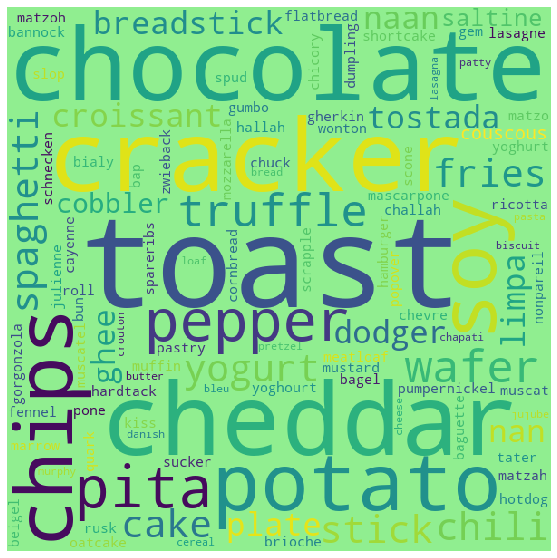

In [200]:
# Identifying the products in the clusters with a wordcloud

wordcloud = WordCloud(width = 700, height = 700, background_color='lightgreen', random_state=2).generate(s)
plot_cloud(wordcloud)

In order to compute the number of products in each cluster, we interpreted 'number of product in each cluster' with the number of words in each cluster, since in our case we have the clusters filled only with food words.\
We have thought to count the times the words appeared in all reviews but the problem with that approach is that a review for one product can contain words related to different products and we do not know to which product the product ID corresponds.

In [208]:
l1 = []
for elem in a[0]:
    l1.append(len(elem))

    

In [209]:
l1

[1, 1, 2, 12, 85, 2, 2, 2]

In [213]:
l2 = [0]*8
l3 = [0]*8
l4 = [[] for i in range(8)]

In [215]:
# Calculating the number of unique users, sum of scores and the total number of different scores for each cluster
for index,row in tqdm.tqdm(df.iterrows()):
    for i in range(8):
        for elem in words_per_cluster(a[0])[i]:
            if elem in row[9]:
                l2[i] += int(row[6])
                l3[i] += 1
                l4[i].append(row[2])

568455it [36:04, 262.64it/s]


In [216]:
l2

[18293, 131454, 36694, 342896, 181502, 55626, 99719, 89311]

In [217]:
l3

[4043, 31343, 8646, 81887, 42889, 12915, 22895, 20577]

In [232]:
for i in range(8):
    print('cluster', i, 'has a mean score of', l2[i]/l3[i])

cluster 0 has a mean score of 4.524610437793718
cluster 1 has a mean score of 4.194046517563731
cluster 2 has a mean score of 4.244043488318297
cluster 3 has a mean score of 4.187429018037051
cluster 4 has a mean score of 4.231900953624472
cluster 5 has a mean score of 4.307084785133566
cluster 6 has a mean score of 4.355492465603843
cluster 7 has a mean score of 4.340331438013316


The difference in the mean is not statistical significant.

In [231]:
for i in range(8):
    print('cluster', i, 'has',len(set(l4[i])),'unique users')

cluster 0 has 3054 unique users
cluster 1 has 18316 unique users
cluster 2 has 5743 unique users
cluster 3 has 35550 unique users
cluster 4 has 22879 unique users
cluster 5 has 8918 unique users
cluster 6 has 14857 unique users
cluster 7 has 13777 unique users


In [220]:
len(l4[0])

4043

## 3. Algorithmic question

To sort the array A we can: 
1. Create (r+1) "buckets" indexed from s to b 
2. For each element e in A put it in the bucket with index e (cost O(n), 1 iteration for each element)
3. Create an empty array B 
4. For each bucket s, s+1, s+2, ... , b-2, b-1, b, scanning them in ascending order from s to b, we can append the elements of each bucket to the end of B (cost O(r), 1 iteration for each bucket)\
\
Therefore, the total cost is O(n+r)